# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## IMPORTANT: Guidelines for a proper conduct of the exercises
1. you should create code that is correct, simple, well organized, indented, commented, which uses self-explanatory names for variables and that is numerically efficient.
2. I expect a responsible interaction during the exercises: the questions should be more related to the conduction of the exercises and to the meaning of the results obtained than to the computational problems. Bugs are usual in coding; for this reason, sooner or later, one should learn to deal with them by oneself ... if you'll be able to, it will be your main achievement in this Laboratory!

## <span style="color:blue">  Numerical exercises 1</span>

### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

---

### Testare la bontà del generatore di numeri casuali

Per testare la validità del generatore di numeri pseudo-casuali, si effettua un'analisi utilizzando il Data Blocking, ovvero si considerano $M$ numeri casuali totali, suddivisi in $N=100$ blocchi da $L$. Così facendo si può valutare la media su ogni blocco e calcolare la media progressiva sugli $N$ blocchi, con le loro deviazioni standard.
Si procede per questa via poichè si vogliono minimizzare gli effetti della correlazione dei numeri pseudo-casuali estratti.

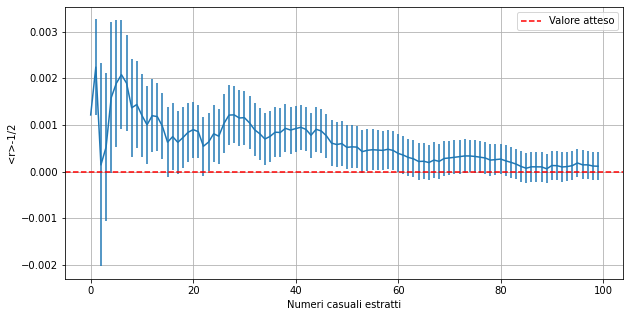

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

risultati_1 = np.loadtxt('results_1.dat')
blocchi = risultati_1[:,0]
medie = risultati_1[:,1]
deviazioni = risultati_1[:,2]

plt.figure(figsize=(10,5))
plt.errorbar(blocchi, medie-0.5, yerr=deviazioni)
plt.axhline(y=0, color='red', linestyle='--', label='Valore atteso')
plt.xlabel('Numeri casuali estratti')
plt.ylabel('<r>-1/2')
plt.grid(True)
plt.legend()
plt.show()

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

Si esegue un procedimento analogo al precedente, solo che in questo caso si estraggono $M$ valori di $(r-\frac{1}{2})^2$, che vengono organizzati in $N=100$ blocchi da $L$.

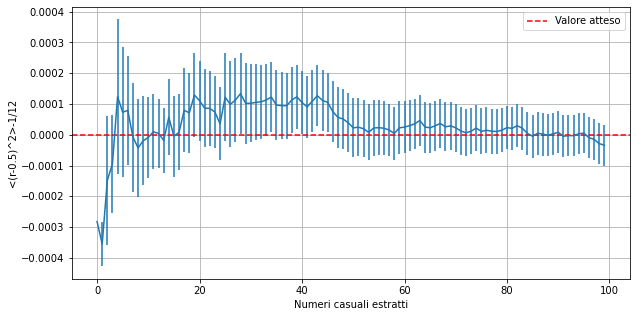

In [2]:
risultati_2 = np.loadtxt('results_2.dat')
blocchi = risultati_2[:,0]
varianze = risultati_2[:,1]
deviazioni = risultati_2[:,2]

plt.figure(figsize=(10,5))
plt.errorbar(blocchi, varianze-1/12, yerr=deviazioni)
plt.axhline(y=0, color='red', linestyle='--', label='Valore atteso')
plt.xlabel('Numeri casuali estratti')
plt.ylabel('<(r-0.5)^2>-1/12')
plt.grid(True)
plt.legend()
plt.show()

---

The hypothesis is that the numbers $r$ are drawn from a uniform distribution. In Statistics we cannot prove that some random events are drawn from a particular distribution (Note, in fact, that such hypothesis is false: pseudo-random numbers are drawn from a deterministic algorithm!); we can try to estimate the probability that $r$ **are not** drawn from a uniform distribution. If this probability is low, we can safely reject this last hypothesis.
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
Pearson's cumulative test statistic $\chi^2$ is a measure of the error between observations, $O_i$, and expected values, $E_i$:
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$
The numerator is a squared distance between observations, $O_i$, and expected values, $E_i$, and thus should be compared (at the denominator) with the expected squared fluctuations (variance) of the relative distribution. Why variance = $E_i$? 
The probability of getting exactly $k$ (independent) successes, each one with probability $p$, in $n$ trials is given by the Binomial distribution (see <a href="https://en.wikipedia.org/wiki/Binomial_distribution">this Wikipedia link</a>):
$$Pr(X=k) = {{n}\choose{k}} p^k (1-p)^{n-k} = \frac{n!}{k! (n-k)!} p^k (1-p)^{n-k}$$
The average of the Binomial distribution is $\langle X \rangle = np$, the variance is: $\sigma^2 = np (1-p)$. Thus if $p$ is small we have that $\sigma^2 \simeq np$, that is $\sigma^2 \simeq \langle X \rangle$ and this explains the denominator $E_i$ in $\chi^2$
</p>

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely ... <font color="red">but before judging</font>, you could compare the histogram of the values obtained for $\chi^2_j$ with the true probability distribution (see: <a href="https://en.wikipedia.org/wiki/Chi-squared_distribution">this Wikipedia link</a>).

---

### Test del chi-quadro

Per determinare la probabilità che i numeri estratti dal generatore di cui siamo forniti siano distribuiti uniformemente, si può costruire un istogramma che rappresenta la distribuzione $\chi^2$ di tale generatore.

In questo caso si valuta un singolo valore del $\chi^2$ utilizzando $n=10000$ numeri casuali nell'intervallo $[0,1]$ diviso in 100 intervalli (per plottare l'istogramma), e valuto il valore di tale funzione 10000 volte.
Per valutare se si ha una buona probabilità che i numeri generati appartengano ad una distribuzione uniforme si può comparare la distribuzione $\chi^2$ costruita con quella teorica contenuta nella libreria Scipy: si può fare ciò estraendo da tale libreria la distribuzione del $\chi^2$ a 100 gradi di libertà e moltiplicarla per 10000, essendo che sto valutando il $\chi^2$ sperimentale 10000 volte.

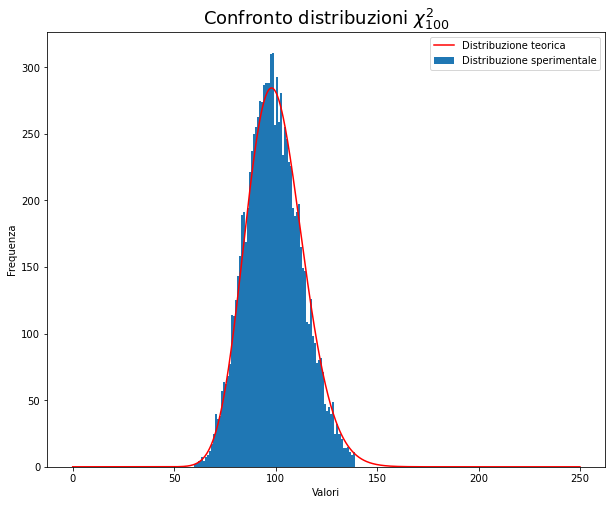

In [3]:
# Confronto la distribuzione chi^2 ottenuta tramite il generatore di numeri casuali in C++ e la distribuzione teorica
from scipy.stats import chi2

risultati_3 = np.loadtxt('results_3.dat')

intervalli = np.arange(60, 140, 1)

plt.figure(figsize=(10,8))
plt.hist(risultati_3, bins=intervalli, label='Distribuzione sperimentale')

x = np.linspace(0, 250, 1000)
y = chi2.pdf(x, 100)*10000
plt.plot(x, y, color='red', label='Distribuzione teorica')

plt.xlabel('Valori')
plt.ylabel('Frequenza')
plt.title('Confronto distribuzioni $\chi^2_{100}$', fontsize=18)
plt.legend()

plt.show()

Da questi paragoni si può constatare come la probabilità che i generatori di numeri casuali utilizzati estraggano i numeri in modo uniforme sia discretamente alta.
Osserviamo che sono stati ottenuti valori del $\chi^2$ che si discostano parecchio dal valore atteso 100 (come per esempio valori più piccolo di 70 o più grandi di 130), il che potrebbe far dubitare dell'ultima constatazione, tuttavia la curva del $\chi^2$ ha una certa pendenza, perciò è lecito aspettarsi valori che si discostano dal valore atteso.

Per finire si confrontano le distribuzioni $\chi^2_j$ sperimentali e teoriche anche per i gradi di libertà $j=10, 30, 50$. Si può fare ciò calcolando il $\chi^2$ con lo stesso procedimento utilizzato in precedenza, solo selezionando $M=10, 30, 50$ intervalli in cui suddividere l'intervallo $[0,1]$ in cui si estraggono i numeri casuali (anche in questo caso si valuta la funzione 10000 volte).

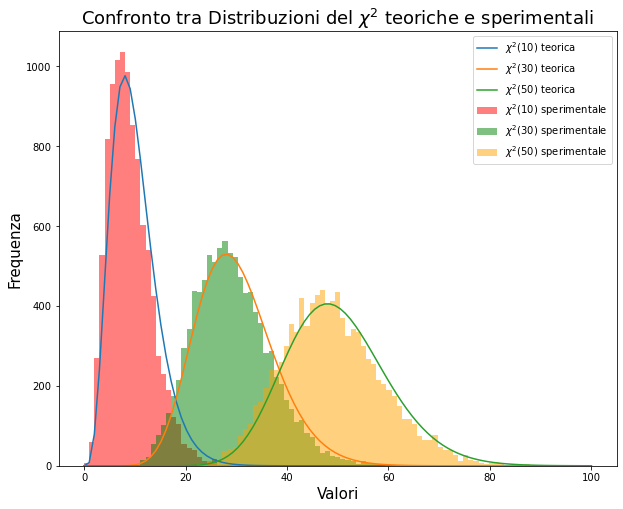

In [4]:
df_values = [10, 30, 50]

risultati_4 = np.loadtxt('results_4.dat')
risultati_5 = np.loadtxt('results_5.dat')
risultati_6 = np.loadtxt('results_6.dat')

intervalli = np.linspace(0, 100, 100)

plt.figure(figsize=(10,8))

# Chi-quadro teorici
for df in df_values:
    x = np.linspace(0, 100, 100)
    y = chi2.pdf(x, df)*10000
    plt.plot(x, y, label=f'$\chi^2$({df}) teorica')

# Chi-quadro sperimentali
plt.hist(risultati_4, bins=intervalli, color='red', alpha=0.5, label='$\chi^2(10)$ sperimentale')
plt.hist(risultati_5, bins=intervalli, color='green', alpha=0.5, label='$\chi^2(30)$ sperimentale')
plt.hist(risultati_6, bins=intervalli, color='orange', alpha=0.5, label='$\chi^2(50)$ sperimentale')

plt.xlabel('Valori', fontsize=15)
plt.ylabel('Frequenza', fontsize=15)
plt.title('Confronto tra Distribuzioni del $\chi^2$ teoriche e sperimentali', fontsize=18)
plt.legend(fontsize=10)

plt.show()

La compatibilità fra questi grafici è quindi verificata.

---

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $A_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

---

### Verifica del Teorema del Limite Centrale

Il Teorema del Limite Centrale afferma che se si hanno $N$ variabili aleatorie $x_i$ statisticamente indipendenti e identicamente distribuite, ovvero aventi la stessa media e la stessa varianza finita, allora per $N$ abbastanza grande la variabile aleatoria $A_N = \frac{1}{N}\sum_{i=1}^N x_i$, tende ad essere distribuita come una gaussiana, avente media come quelle delle variabili precedenti, e varianza ridotta di un fattore $N$.

Per verificare la validità del Teorema del Limite Centrale si possono estrapolare $10^4$ valori della variabile aleatoria $A_N$ per $N=1,2,10,100$, e verificare che tali estrapolazioni siano distribuite come una gaussiana per quanto riguarda le variabili estratte dal dado standard e dalla distribuzione esponenziale. Il Teorema del Limite Centrale non dovrebbe valere per le variabili estratte dalla distribuzione lorenziana, essendo che tale distribuzione non ha varianza finita.

Per estrarre variabili casuali dalle distribuzioni esponenziale e lorenziana, si utilizza il metodo dell'inversa della distribuzione cumulativa.  
Essendo $p(x)$ una distribuzione di probabilità, la sua cumulativa è determinata da $F(x)=\int_{-\infty}^x p(x')\,dx'$, che restituisce la probabilità che una variabile casuale sia minore o uguale a un certo valore $x$.  
Si calcola quindi l'inverso della funzione di distribuzione cumulativa della distribuzione desiderata, e si applica tale distribuzione ad un valore casuale generato uniformemetnte in $[0,1]$. Questo restituisce un valore casuale distribuito secondo la distribuzione desiderata.

Le variabili aleatorie generate rispettivamente da distribuzioni esponenziale $p(x) = \lambda e^{-\lambda x}$ e lorenziana $p(x) = \frac{\Gamma}{\pi(x^2 + \Gamma^2)}$ (con $\mu = 0$) sono quindi rispettivamente:

- $x = -\frac{1}{\lambda}\ln(1-y)$, dove $y\in [0,1]$.
- $x = \Gamma\tan\Big[\pi\big(y-\frac{1}{2}\big)\Big]$, dove $y\in [0,1]$.

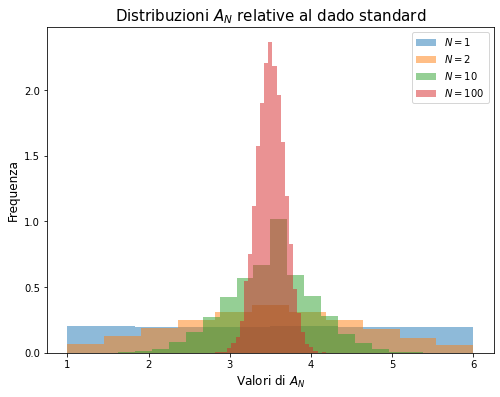

In [5]:
dadi = np.loadtxt("results_dice.dat")

column1 = dadi[:, 0]
column2 = dadi[:, 1]
column3 = dadi[:, 2]
column4 = dadi[:, 3]

plt.figure(figsize=(8,6))

intervalli = np.linspace(1, 6, 100)
intervalli2 = np.linspace(1, 6, 7)
intervalli3 = np.linspace(1, 6, 12)
intervalli4 = np.linspace(1, 6, 25)

# Scelgo dei bins diversi per i quattro istogrammi per rendere il grafico visivamente apprezzabile
plt.hist(column1, bins=intervalli2, alpha=0.5, label='$N=1$', density=True)
plt.hist(column2, bins=intervalli3, alpha=0.5, label='$N=2$', density=True)
plt.hist(column3, bins=intervalli4, alpha=0.5, label='$N=10$', density=True)
plt.hist(column4, bins=intervalli, alpha=0.5, label='$N=100$', density=True)

plt.xlabel('Valori di $A_N$', fontsize=12)
plt.ylabel('Frequenza', fontsize=12)
plt.title('Distribuzioni $A_N$ relative al dado standard', fontsize=15)
plt.legend()

plt.show()

Nel caso delle variabili aleatorie estratte dal lancio del dado standard, per $N=1$ ottengo una distribuzione $A_N$ uniforme nell'intervallo $[1,6]$, come ci si poteva aspettare, mentre per $N$ crescente si osserva la distribuzione tendere ad una gaussiana. In seguito verrà comparata la distribuzione che si ottiene per $N=100$ con una gaussiana avente valore atteso e deviazione standard propri della distribuzione uniforma (con varianza ridotta di un fattore $N$).

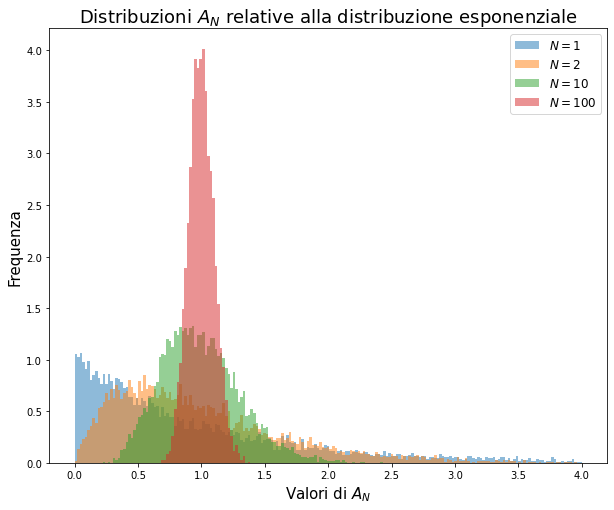

In [6]:
esponenziale = np.loadtxt("results_exp.dat")

column1 = esponenziale[:, 0]
column2 = esponenziale[:, 1]
column3 = esponenziale[:, 2]
column4 = esponenziale[:, 3]

intervalli = np.linspace(0, 4, 200)

plt.figure(figsize=(10,8))

plt.hist(column1, bins=intervalli, alpha=0.5, label='$N=1$', density=True)
plt.hist(column2, bins=intervalli, alpha=0.5, label='$N=2$', density=True)
plt.hist(column3, bins=intervalli, alpha=0.5, label='$N=10$', density=True)
plt.hist(column4, bins=intervalli, alpha=0.5, label='$N=100$', density=True)

plt.xlabel('Valori di $A_N$', fontsize=15)
plt.ylabel('Frequenza', fontsize=15)
plt.title('Distribuzioni $A_N$ relative alla distribuzione esponenziale', fontsize=18)
plt.legend(fontsize=12)

plt.show()

Nel caso delle variabili aleatorie estratte dalla distrtibuzione esponenziale, per $N=1$ ottengo una distribuzione $A_N$ esponenziale, come ci si poteva aspettare, mentre per $N$ crescente si osserva la distribuzione tendere ad una gaussiana. Anche in questo caso, in seguito verrà comparata la distribuzione che si ottiene per $N=100$ con una gaussiana con valore atteso e varianza proprie di una distribuzione esponenziale con parametro $\lambda$ fissato (con la varianza ridotta di un fattore $N=100$).

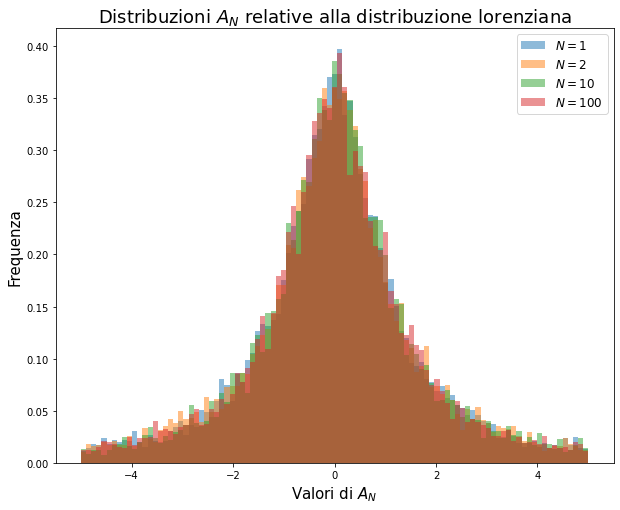

In [7]:
lorenziana = np.loadtxt("results_lor.dat")

column1 = lorenziana[:, 0]
column2 = lorenziana[:, 1]
column3 = lorenziana[:, 2]
column4 = lorenziana[:, 3]


plt.figure(figsize=(10,8))

intervalli = np.linspace(-5, 5, 100)

plt.hist(column1, bins=intervalli, alpha=0.5, label='$N=1$', density=True)
plt.hist(column2, bins=intervalli, alpha=0.5, label='$N=2$', density=True)
plt.hist(column3, bins=intervalli, alpha=0.5, label='$N=10$', density=True)
plt.hist(column4, bins=intervalli, alpha=0.5, label='$N=100$', density=True)

plt.xlabel('Valori di $A_N$', fontsize=15)
plt.ylabel('Frequenza', fontsize=15)
plt.title('Distribuzioni $A_N$ relative alla distribuzione lorenziana', fontsize=18)
plt.legend(fontsize=12)

plt.show()

Nel caso delle variabili aleatorie estratte dalla distribuzione lorenziana, per $N$ diverso si osserva un comportamento simile della distribuzione $A_N$. Anche se per $N$ generico questa distribuzione ha una forma a campana tipica della gaussiana, essa non può essere considerata tale, visto come la sua coda tende a 0 molto lentamente. Osservo quindi come il Teorema del Limite Centrale non vale per la distribuzione lorenziana, essendo che questa non ha varianza finita.

Ora si confrontano le distribuzioni $A_N$ ottenute dalle variabili aleatorie di dado standard ed esponenziali per $N=100$ con due distribuzioni gaussiane, rispettivamente con media e varianza $\mu_1 = 3.5\,, \sigma_1 = \frac{3}{\sqrt{12N}}$ e $\mu_2 = 1\,, \sigma_2 = \frac{1}{\sqrt{N}}$.

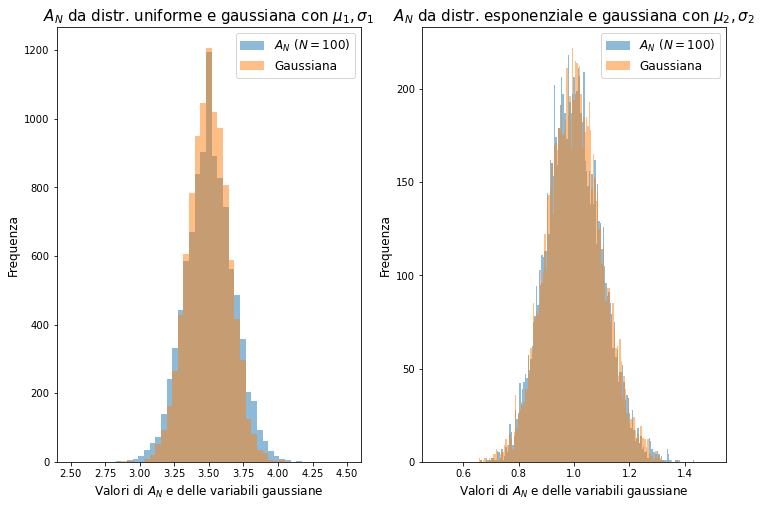

In [11]:
gauss = np.loadtxt("results_gauss.dat")

data1 = dadi[:, 3]
data2 = esponenziale[:, 3]
gauss1 = gauss[:, 0]
gauss2 = gauss[:, 1]

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
plt.figure(figsize=(12,8))

intervalli1 = np.linspace(2.5, 4.5, 50)
intervalli2 = np.linspace(0.5, 1.5, 200)

# ax1
plt.subplot(1,2,1)
plt.hist(data1, bins=intervalli1, alpha=0.5, label='$A_N\,\,(N=100)$')
plt.hist(gauss1, bins=intervalli1, alpha=0.5, label='Gaussiana')
plt.xlabel('Valori di $A_N$ e delle variabili gaussiane', fontsize=12)
plt.ylabel('Frequenza', fontsize=12)
plt.title('$A_N$ da distr. uniforme e gaussiana con $\mu_1, \sigma_1$', fontsize=15)
plt.legend(fontsize=12)

# ax2
plt.subplot(1,2,2)
plt.hist(data2, bins=intervalli2, alpha=0.5, label='$A_N\,\,(N=100)$')
plt.hist(gauss2, bins=intervalli2, alpha=0.5, label='Gaussiana')
plt.xlabel('Valori di $A_N$ e delle variabili gaussiane', fontsize=12)
plt.ylabel('Frequenza', fontsize=12)
plt.title('$A_N$ da distr. esponenziale e gaussiana con $\mu_2, \sigma_2$', fontsize=15)
plt.legend(fontsize=12)

plt.show()

Si nota una notevole compatibilità fra le distribuzioni $A_N$ e le due gaussiane, il che verifica il Teorema del Limite Centrale per distribuzioni uniformi ed esponenziali.